In [13]:
# Connect notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
# Navigate to the shared drive folder
%cd /content/drive/'My Drive'/'Cardiovascular Knowledge Graph'
!pwd
!ls

/content/drive/My Drive/Cardiovascular Knowledge Graph
/content/drive/My Drive/Cardiovascular Knowledge Graph
cardiac_conduction.ipynb  muscle_contraction_graph.ipynb
data			  muscle_contraction.ipynb
filter_organism.ipynb	  output


In [18]:
%cd output

/content/drive/My Drive/Cardiovascular Knowledge Graph/output


In [19]:
!ls

cardiac_conduction_all_organisms.csv  example.png
cardiac_conduction_filtered.csv       muscle_contraction_filtered.csv
cardiac_conduction_filtered.json      muscle_contraction_filtered.json
cardiac_conduction.json		      muscle_contraction.png


In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Mapping

In [20]:
full_table = pd.read_csv("muscle_contraction_filtered.csv")
cardiac_table = pd.read_csv("cardiac_conduction_filtered.csv")

In [59]:
len(set(cardiac_table['Protein ID']))

443

In [21]:
set(full_table['Reactome Pathway ID'])

{'R-HSA-397014', 'R-MMU-397014', 'R-RNO-397014', 'R-SSC-397014'}

In [26]:
def sort_contraction(full_table, cardiac_table):
  """
  sorts as follows:
  {'Muscle Contraction' : {'Cardiac Conduction' : {p1 : [<->]}}, {'Not CC' : {p1 : [<->]}}}
  """
  full_proteins = list(full_table['Protein ID'])
  cardiac_proteins = list(cardiac_table['Protein ID'])
  overlap_proteins = list(set(full_proteins) - set(cardiac_proteins)) #proteins in full_pathway but not in cardiac_pathway

  d = {'Muscle Contraction' : {'Cardiac Conduction' : {},
       'Not CC' : overlap_proteins}}
  
  for k in list(set(cardiac_table['Reactome Pathway ID'])):
    search_val = cardiac_table[cardiac_table['Reactome Pathway ID'] == k]
    d['Muscle Contraction']['Cardiac Conduction'][k] = list(search_val['Protein ID'])
  
  return d

def sort_cardiac_pathway_protein(cardiac_table):
  """
  sorts cardiac conduction proteins as follows:
  {'Pathway ID' : [protein IDs in pathway]}
  """
  d = {}
  
  for k in range(len(cardiac_table['Protein ID'])):
    pathway_id = list(cardiac_table['Reactome Pathway ID'])[k]
    protein_id = list(cardiac_table['Protein ID'])[k]
    if pathway_id in d.keys():
      d[pathway_id].append(protein_id)
    else:
      d[pathway_id] = [protein_id]

  return d

def sort_muscle_pathway_protein(full_table, cardiac_table):
  """
  sorts ALL muscle contraction proteins as follows:
  {'Pathway ID' : [protein IDs in pathway]}
  """
  d = sort_cardiac_pathway_protein(cardiac_table)

  for k in range(len(full_table['Protein ID'])):
    pathway_id = list(full_table['Reactome Pathway ID'])[k]
    protein_id = list(full_table['Protein ID'])[k]
    if pathway_id in d.keys():
      d[pathway_id].append(protein_id)
    else:
      d[pathway_id] = [protein_id]
  
  return d

def create_cardiac_conduction_graph(cardiac_table):
  """
  pathway <- protein
  """
  d = sort_cardiac_pathway_protein(cardiac_table)
  g = nx.DiGraph()
  g.add_nodes_from(d.keys())

  #k -> pathway ID
  #v -> protein ID in k
  for k, v in d.items():
      g.add_edges_from(([(x, k) for x in v]))
  
  pos = nx.spring_layout(g, k=1/np.sqrt(len(g.nodes())), iterations=20)
  plt.figure(3, figsize=(30, 30))
  nx.draw(g, pos=pos)
  nx.draw_networkx_labels(g, pos=pos)
  plt.show()

def create_muscle_contraction_graph(full_table, cardiac_table):
  """
  muscle contraction and cardiac conduction proteins graphed and mapped to pathways
  """
  d = sort_muscle_pathway_protein(full_table, cardiac_table)
  g = nx.DiGraph()
  g.add_nodes_from(d.keys())

  #k -> pathway ID
  #v -> protein ID in k
  for k, v in d.items():
      g.add_edges_from(([(x, k) for x in v]))
  
  pos = nx.spring_layout(g, k=1/np.sqrt(len(g.nodes())), iterations=20)
  plt.figure(3, figsize=(30, 30))
  nx.draw(g, pos=pos)
  nx.draw_networkx_labels(g, pos=pos)
  plt.show()
  

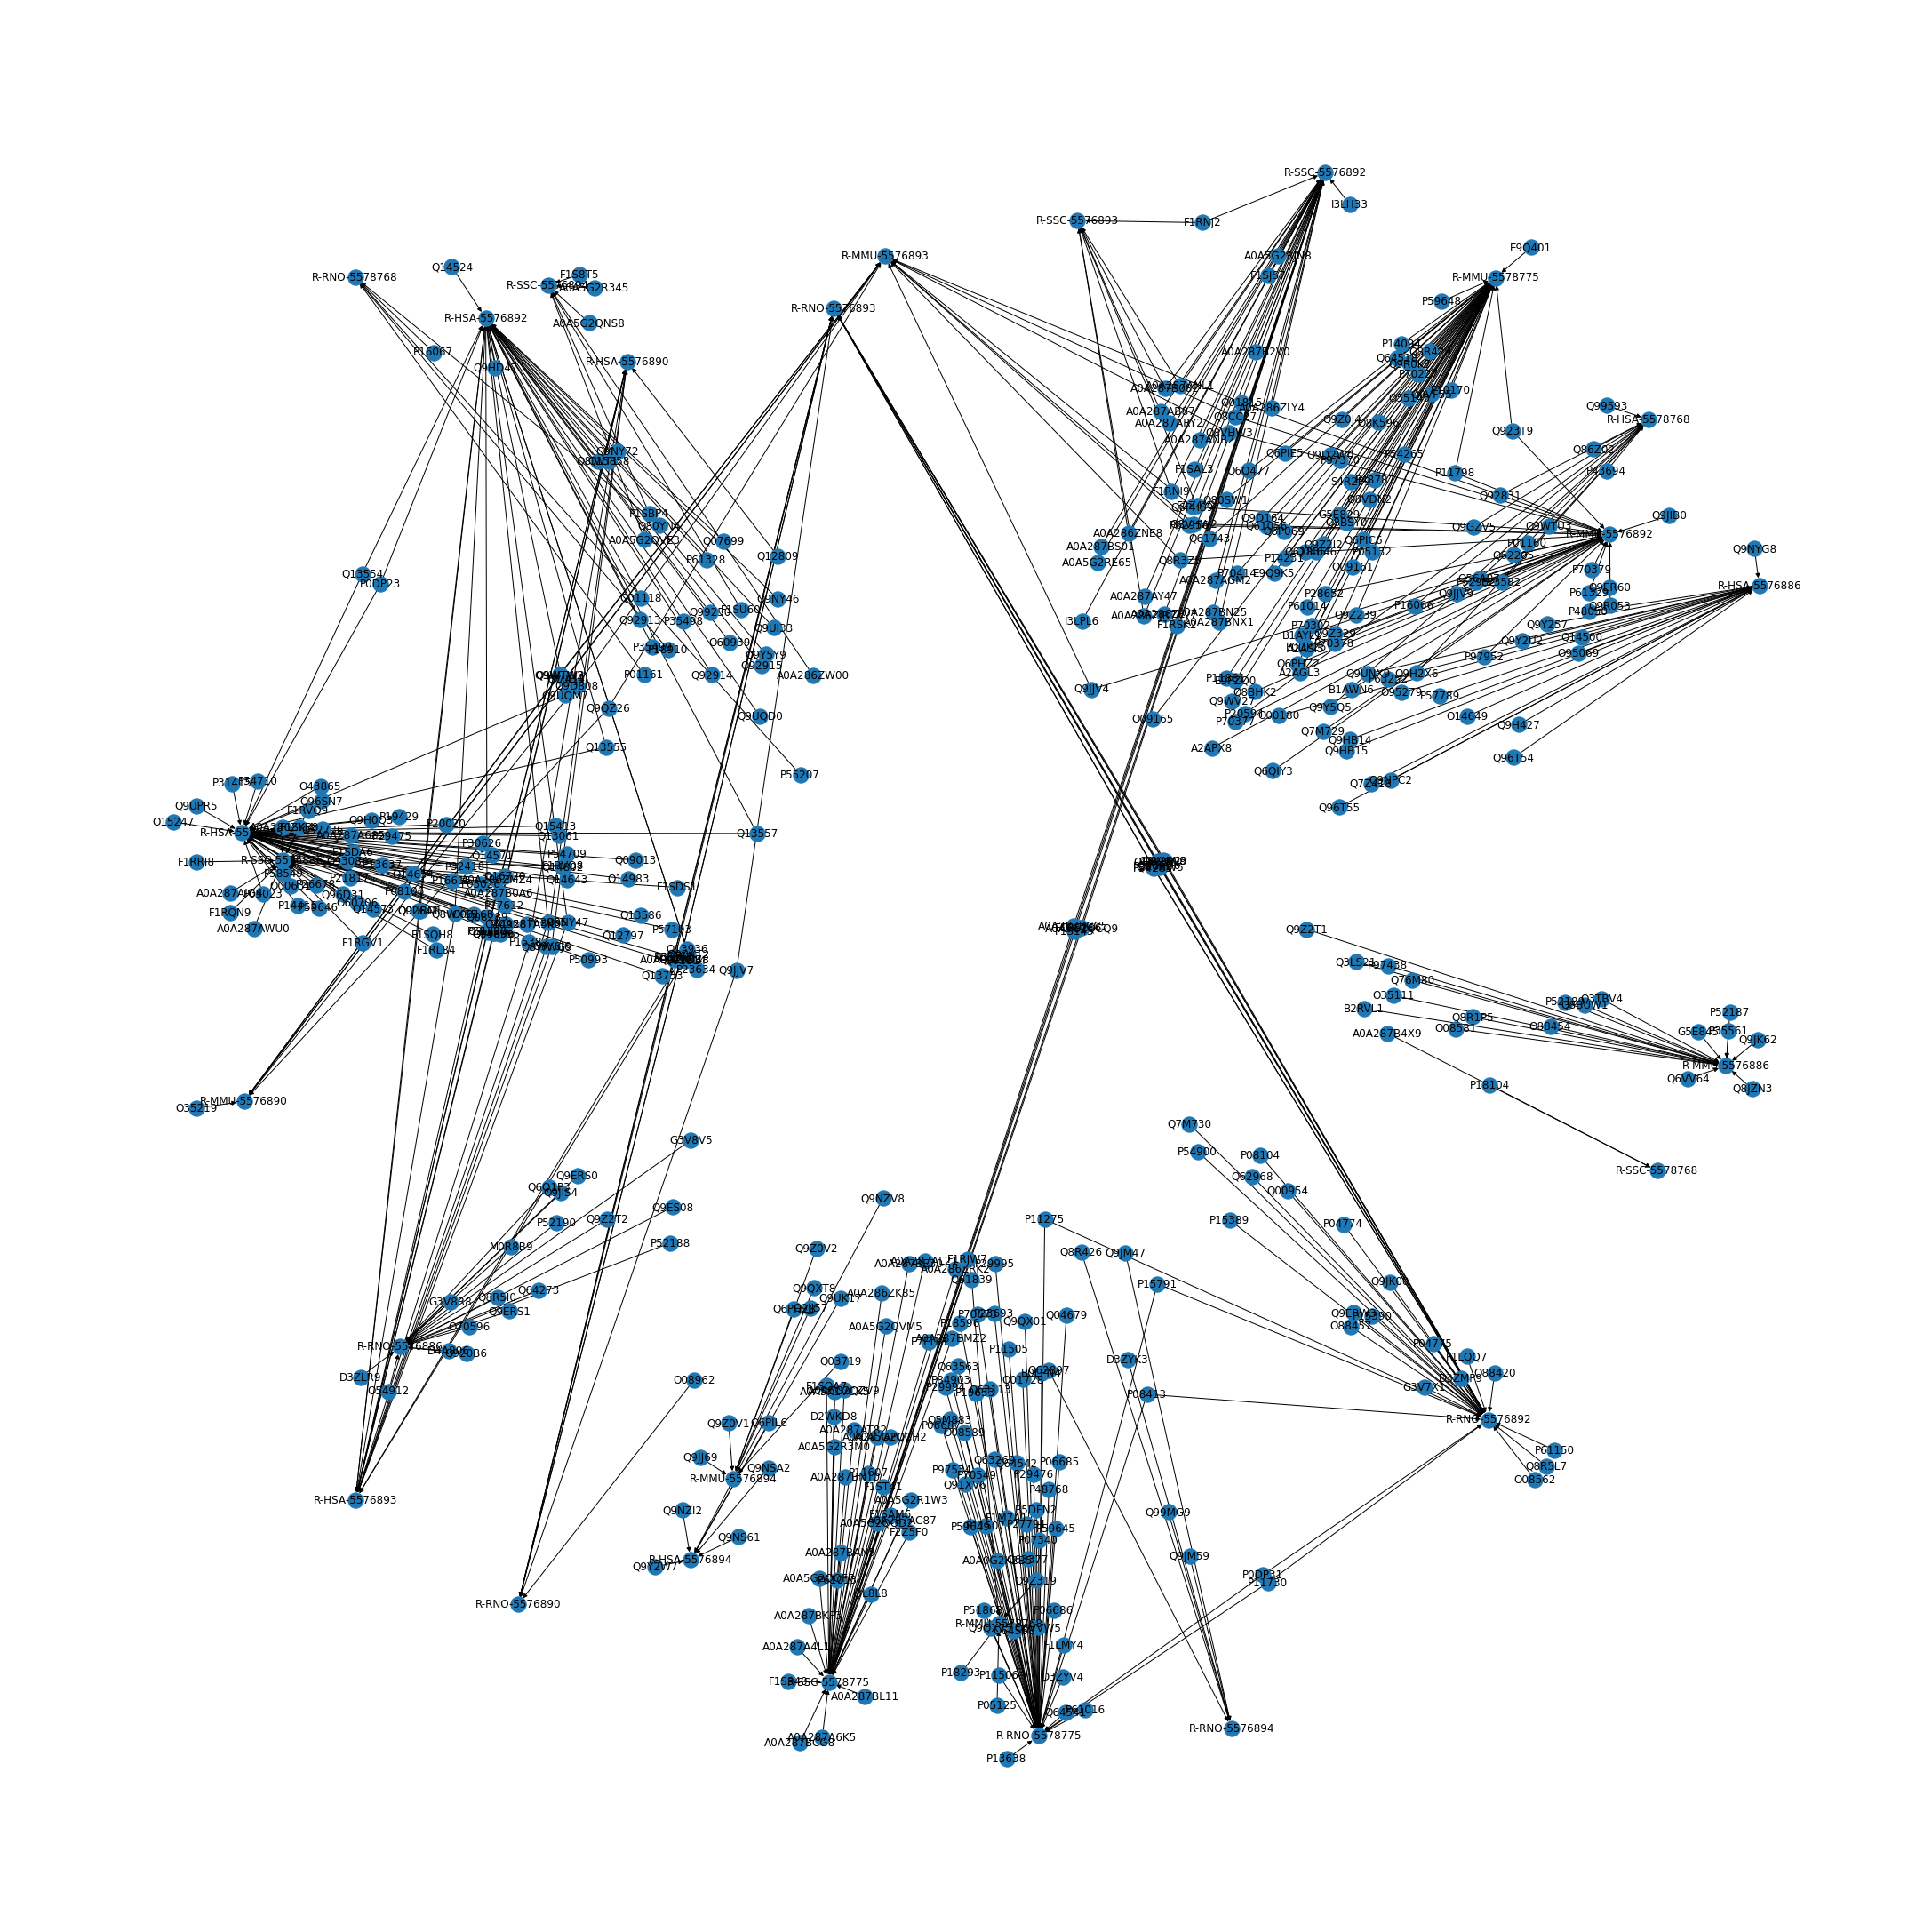

In [ ]:
create_cardiac_conduction_graph(cardiac_table)

In [ ]:
create_muscle_contraction_graph(full_table, cardiac_table)

# **Using PyVis**

In [ ]:
!pip install pyvis

In [23]:
from pyvis.network import Network
from IPython.core.display import display, HTML

In [105]:
def pyvis_cardiac_conduction(cardiac_table):
  """
  utilizes pyvis to create cardiac conduction graph
  """
  d = sort_cardiac_pathway_protein(cardiac_table)
  g = Network(height = 750, width = 1500)

  g.add_nodes(d.keys())

  for k, v in d.items():
    g.add_nodes(v)
  
  for k, v in d.items():
    for value in v:
      title_display = "from " + value + " to " + k
      g.add_edge(k, value, title = title_display)
  
  t = "cardiac_conduction.html"
  g.show(t)
  display(HTML(t))

  #return len(g.nodes)

In [103]:
def pyvis_muscle_contraction(full_table, cardiac_table):
  """
  utilizes pyvis to create muscle contraction graph
  """
  d = sort_muscle_pathway_protein(full_table, cardiac_table)
  g = Network(height = 750, width = 1500)

  g.add_nodes(d.keys())

  for k, v in d.items():
    g.add_nodes(v)
  
  for k, v in d.items():
    for value in v:
      title_display = "from " + value + " to " + k
      g.add_edge(k, value, title = title_display)
  
  t = "muscle_contraction.html"
  g.show(t)
  display(HTML(t))

  return g

In [106]:
pyvis_cardiac_conduction(cardiac_table)

In [104]:
g = pyvis_muscle_contraction(full_table, cardiac_table)

In [ ]:
g.edges

In [ ]:
g.nodes